<a href="https://colab.research.google.com/github/Jamal-1018/Book_Recommeder_System_Unsupervised_learning/blob/main/Book_recommendation_sysytem_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - **Unsupervised Learning**
##### **Contribution**    - **Individual**
##### **Name**            - **Mohammad Jamaluddin**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Jamal-1018/Book_Recommeder_System_Unsupervised_learning/blob/main/Book_recommendation_sysytem_unsupervised.ipynb

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

# For Visualization of plots and charts
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Library for connecting to the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [3]:
# Load Dataset
books   = pd.read_csv('/content/drive/MyDrive/ALMABETTER CAPSTONE PROJECTS/BOOK_RECOMMENDATION_SYSTEM_UNSUPERVISED_Learning/Books.csv')
ratings = pd.read_csv('/content/drive/MyDrive/ALMABETTER CAPSTONE PROJECTS/BOOK_RECOMMENDATION_SYSTEM_UNSUPERVISED_Learning/Ratings.csv')
users   = pd.read_csv('/content/drive/MyDrive/ALMABETTER CAPSTONE PROJECTS/BOOK_RECOMMENDATION_SYSTEM_UNSUPERVISED_Learning/Users.csv')

<ipython-input-3-c3a1fb7d71dc>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books   = pd.read_csv('/content/drive/MyDrive/ALMABETTER CAPSTONE PROJECTS/BOOK_RECOMMENDATION_SYSTEM_UNSUPERVISED_Learning/Books.csv')


from google.colab import drive
drive.mount('/content/drive')

### Dataset First View

In [4]:
# Dataset First Look
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
users.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Dataset Rows & Columns count

In [7]:
# Books dataset Rows & Columns count
print(f'The number of rows in books : {books.shape[0]}')
print(f'The number of columns in books : {books.shape[1]}')

The number of rows in books : 271360
The number of columns in books : 8


In [8]:
# Users data count
print(f'The number of rows in users : {users.shape[0]}')
print(f'The number of columns in users : {users.shape[1]}')

The number of rows in users : 278858
The number of columns in users : 3


In [9]:
# Ratings data count
print(f'The number of rows in ratings : {ratings.shape[0]}')
print(f'The number of columns in ratings : {ratings.shape[1]}')

The number of rows in ratings : 1149780
The number of columns in ratings : 3


### Dataset Information

In [10]:
# Dataset Info
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [11]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


#### Duplicate Values

In [13]:
# Dataset Duplicate Value Count
books.duplicated().sum()

0

In [14]:
ratings.duplicated().sum()

0

In [15]:
users.duplicated().sum()

0

#### Missing Values/Null Values

In [16]:
# Missing Values/Null Values Count
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [17]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [18]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

<Axes: >

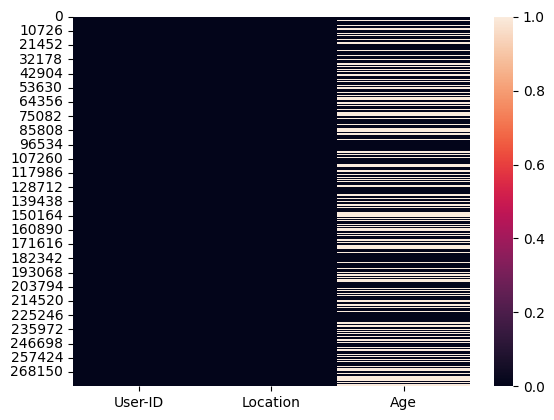

In [19]:
# Visualizing the missing values
sns.heatmap(users.isnull())

<Axes: >

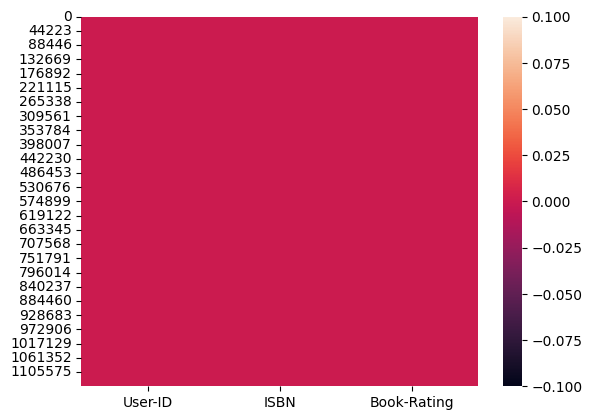

In [20]:
sns.heatmap(ratings.isnull())

<Axes: >

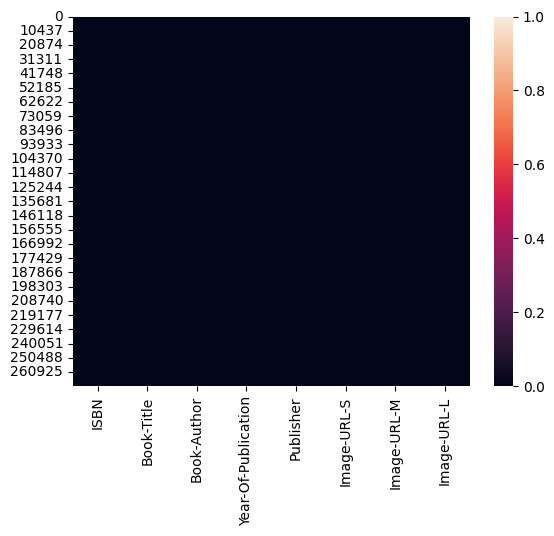

In [21]:
sns.heatmap(books.isnull())

### What did you know about your dataset?

Our users dataset consists of 50% null values.

## ***2. Understanding Your Variables***

In [22]:
# Dataset Columns
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [23]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [24]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [25]:
# Dataset Describe
books.describe().T

,count,unique,top,freq
ISBN,271360,271360,0195153448,1
Book-Title,271360,242135,Selected Poems,27
Book-Author,271359,102023,Agatha Christie,632
Year-Of-Publication,271360,202,2002,13903
Publisher,271358,16807,Harlequin,7535
Image-URL-S,271360,271044,http://images.amazon.com/images/P/185326119X.0...,2
Image-URL-M,271360,271044,http://images.amazon.com/images/P/185326119X.0...,2
Image-URL-L,271357,271041,http://images.amazon.com/images/P/225307649X.0...,2


In [26]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,1149780.0,140386.395126,80562.277719,2.0,70345.0,141010.0,211028.0,278854.0
Book-Rating,1149780.0,2.866950,3.854184,0.0,0.0,0.0,7.0,10.0


In [27]:
users.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,278858.0,139429.500000,80499.515020,1.0,69715.25,139429.5,209143.75,278858.0
Age,168096.0,34.751434,14.428097,0.0,24.00,32.0,44.00,244.0


### Variables Description

books:
  - ISBN        : International Standard Book Number (Invalid ISBNs have already been removed from the dataset).
  - Book-Title           : Title of the book
  - Book-Author          : Author of the book
  - Year-Of-Publication  : Year
  - Publisher            : Publisher
  - Image - S : url for small size image
  - Image - M : url for medium size image
  - Image - L : url for large size image

ratings:
  - User-ID : Anonymized user_id
  - ISBN :  International Standard Book Number
  - Book-Rating : rating on the scale of 1 - 10 (higher value denoting higher appreciation)

users:
  - User-ID : Anonymized user_id
  - Location : location of the user (null if unavailable)
  - Age : age of the user (null if unavailable)

### Check Unique Values for each variable.

In [28]:
# Check Unique Values for each variable.
def nunique_val(df):
  for i in df.columns:
    print(f'The number of unique values in {i} variable is {df[i].nunique()}')

In [29]:
nunique_val(books)

The number of unique values in ISBN variable is 271360
The number of unique values in Book-Title variable is 242135
The number of unique values in Book-Author variable is 102023
The number of unique values in Year-Of-Publication variable is 202
The number of unique values in Publisher variable is 16807
The number of unique values in Image-URL-S variable is 271044
The number of unique values in Image-URL-M variable is 271044
The number of unique values in Image-URL-L variable is 271041


In [30]:
nunique_val(users)

The number of unique values in User-ID variable is 278858
The number of unique values in Location variable is 57339
The number of unique values in Age variable is 165


In [31]:
nunique_val(ratings)

The number of unique values in User-ID variable is 105283
The number of unique values in ISBN variable is 340556
The number of unique values in Book-Rating variable is 11


## 3. ***Data Wrangling***

### Data Wrangling Code

In [32]:
# renaming the columns in the dataset
books.rename(columns = {'ISBN' : 'isbn', 'Book-Title':'book_title','Book-Author' : 'book_author','Year-Of-Publication' : 'year_of_publication',
                        'Publisher' : 'publisher', 'Image-URL-S' : 'image_s', 'Image-URL-M' : 'image_m', 'Image-URL-L' : 'image_l'}, inplace = True)

In [33]:
users.rename(columns = {'User-ID' : 'user_id', 'Location' : 'location', 'Age' : 'age'}, inplace = True)

In [34]:
ratings.rename(columns = {'User-ID' : 'user_id', 'ISBN' : 'isbn','Book-Rating' : 'book_rating'}, inplace = True)

In [35]:
# converting the datatypes of the variables in the datasets
books['year_of_publication'] = pd.to_numeric(books['year_of_publication'], errors = 'coerce')
ratings['user_id']  = ratings['user_id'].astype(int)
ratings['book_rating'] = ratings['book_rating'].astype(int)
users['user_id'] = users['user_id'].astype(int)
users['age']  = users['age'].astype(float)

In [36]:
# Handling wrong entry of date value in this row with reference of this book year
books.loc[books['year_of_publication'] == 2037.0, 'year_of_publication'] = 1937.0

In [37]:
# Creating new variables from the location variable
location  = users.location.str.split(',',n = 2, expand = True)
users['city' ]   = location[0]
users['state']   = location[1]
users['country'] = location[2]

#### Merging the dataset for further analysis

In [38]:
# Merging three datasets
data  = pd.merge(books,ratings, on = 'isbn')
data = pd.merge(data,users, on = 'user_id')
data.head(3)

,isbn,book_title,book_author,year_of_publication,publisher,image_s,image_m,image_l,user_id,book_rating,location,age,city,state,country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0,stockton,california,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN,timmins,ontario,canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN,timmins,ontario,canada


In [39]:
# Dropping the uwanted columns and assigning it to the variable
df = data.drop(columns = ['location', 'image_s','image_m','image_l'],axis = 1)
df

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,age,city,state,country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,2,0,18.0,stockton,california,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,5,NaN,timmins,ontario,canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,8,0,NaN,timmins,ontario,canada
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,8,0,NaN,timmins,ontario,canada
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,8,0,NaN,timmins,ontario,canada
...,...,...,...,...,...,...,...,...,...,...,...
1031131,087004124X,Anthem,Ayn Rand,1966.0,Caxton Press,259589,8,19.0,venice,florida,usa
1031132,158243123X,A Student of Weather,Elizabeth Hay,2001.0,Counterpoint Press,259591,8,39.0,tioga,pennsylvania,usa
1031133,8485900057,Rimas y leyendas (ClÃ¡sicos Fraile ; 3),Gustavo Adolfo BÃ©cquer,1981.0,Ediciones Fraile,259614,10,22.0,madrid,madrid,spain
1031134,0838934854,Anglo-American Cataloguing Rules,Michael Gorman,1998.0,American Library Association,259679,6,27.0,grand prairie,texas,usa


In [40]:
# the shape of the dataframe after merging
df.shape

(1031136, 11)

### What all manipulations have you done and insights you found?

- **Renamed the columns all the three datasets**
- **Changed the datatypes of the required variables**
- **Handled a missing entry of a row**
- **Created new variables city, state,country**
- **Merged the three data datasets into one dataframe**
-**Removed unwanted variables from the dataset**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Age distribution

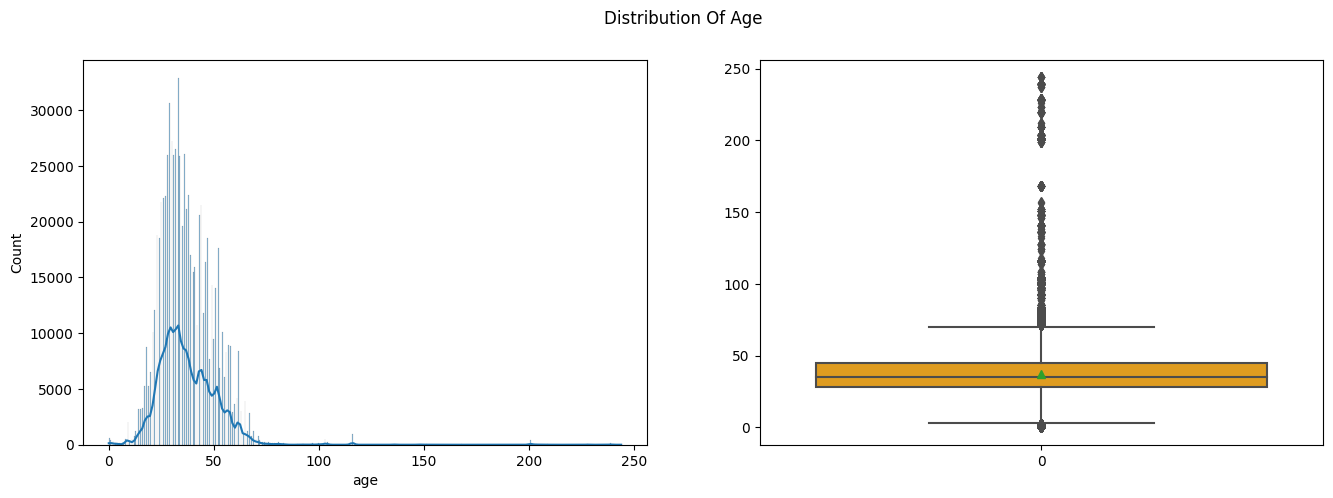

<Figure size 640x480 with 0 Axes>

In [41]:
#Visualization of age variable and its distribution
fig, ax = plt.subplots(1,2,figsize = ( 16,5))
sns.histplot(df['age'],kde = True, ax = ax[0])
sns.boxplot(df['age'], ax =ax[1], showmeans = True, color = 'orange')
fig.suptitle('Distribution Of Age')
plt.show()
plt.tight_layout()


##### 1. Why did you pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, We used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

A boxplot is used to summarize the key statistical characteristics of a dataset, including the median, quartiles, and range, in a single plot. Boxplots are useful for identifying the presence of outliers in a dataset, comparing the distribution of multiple datasets, and understanding the dispersion of the data. They are often used in statistical analysis and data visualization.

##### 2. What is/are the insight(s) found from the chart?

From the above analysis, below are insights:
- The age variable has positive distribution.
- There are outliers in this variable

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the histogram and boxplot could potentially help in creating a positive business impact by allowing for a better understanding of the data and its distribution. Understanding the distribution of age and the presence of outliers could help in creating more accurate and personalized book recommendations for users. However, additional analysis and data may be necessary to achieve the business goal of creating an effective book recommendation system.

#### Chart - 2 Book Rating distribution

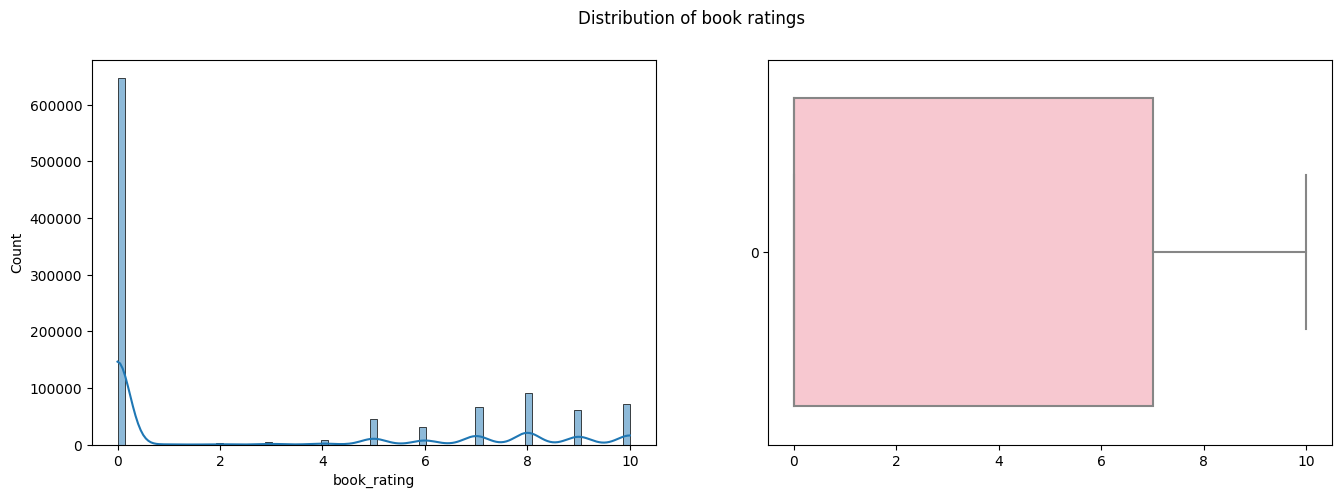

In [42]:
#visualization of book ratings
fig, ax = plt.subplots(1,2, figsize = (16,5))
sns.histplot(df['book_rating'], kde = True, ax = ax[0])
sns.boxplot(df['book_rating'],ax = ax[1], color = 'pink', orient = 'h')
plt.suptitle('Distribution of book ratings')
plt.show()

##### 1. Why did you pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, We used this histplot on book ratings variable to observe the distribution over the whole dataset whether it's symmetric or not.

A boxplot is used to summarize the key statistical characteristics of a dataset, including the median, quartiles, and range, in a single plot. Boxplots are useful for identifying the presence of outliers in a dataset, comparing the distribution of multiple datasets, and understanding the dispersion of the data. They are often used in statistical analysis and data visualization.

##### 2. What is/are the insight(s) found from the chart?

From the above analysis, below insights are:
- Majority of the occurences are lying at 0, which shows the positive skewness of the distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights alone may not be sufficient to create a positive business impact and additional analysis and data may be necessary to achieve the business goal of creating an effective book recommendation system.

#### Chart - 3 Visualization of Explicit values of book ratings

<ipython-input-43-d8645a84fd65>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(explicit['book_rating'], kde = True, ax =axes[0])


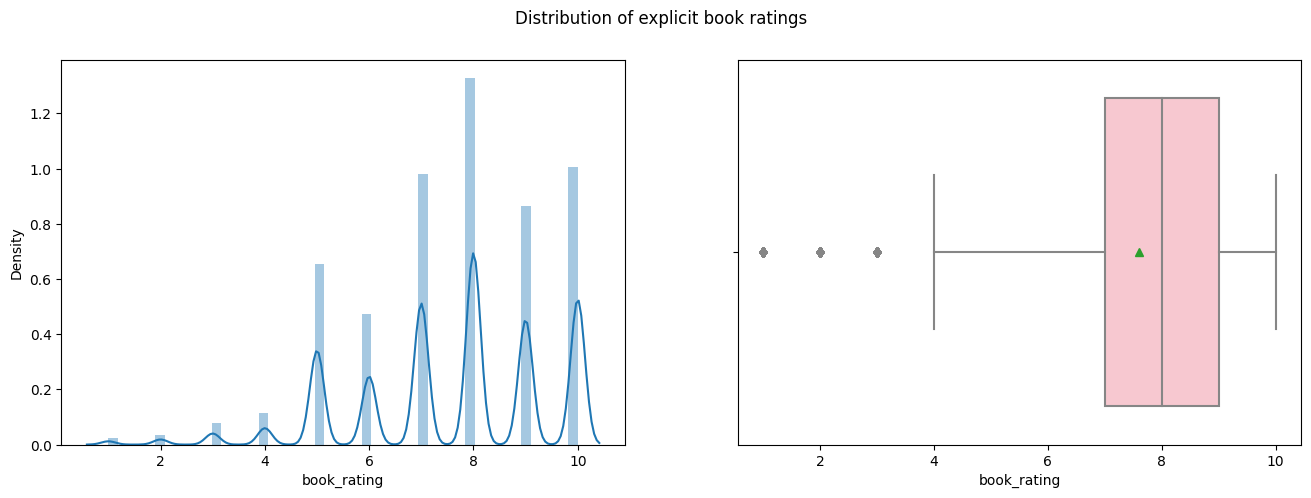

In [43]:
# Visualization on explicit ratings
explicit = ratings[ratings['book_rating'] != 0 ]
fig, axes =plt.subplots(1,2, figsize = (16,5))
sns.distplot(explicit['book_rating'], kde = True, ax =axes[0])
sns.boxplot(x = explicit['book_rating'],showmeans= True, ax =axes[1], color = 'pink')
plt.suptitle('Distribution of explicit book ratings')
plt.show()

##### 1. Why did you pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

A boxplot is used to summarize the key statistical characteristics of a dataset, including the median, quartiles, and range, in a single plot. Boxplots are useful for identifying the presence of outliers in a dataset, comparing the distribution of multiple datasets, and understanding the dispersion of the data. They are often used in statistical analysis and data visualization.

##### 2. What is/are the insight(s) found from the chart?

The insights from the above analysis are as follows:
- The range of values spans from 1 to 10, with the majority of instances clustering around 8.
- The mean value, as observed in the boxplot, is at 7.5."

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Alone, these insights may not be sufficient to create a positive business impact. Additional analysis and data may be necessary to achieve the business goal of creating an effective book recommendation system.

#### Function for plotting bar chart

In [197]:
# Creating a function to plot bar Chart
def bar_plot(df, col):
  '''This function takes the dataframe and a column as an input and extract the top 15 values which has a highest number of occurences
   and plot a bar chart with respective to the given variable'''
  temp_df = df[col].value_counts().reset_index()
  temp_df.columns = [col, 'count']
  temp_df = temp_df.sort_values(by = 'count', ascending = False).head(15)

  plt.figure(figsize = (16,8))
  sns.barplot(data = temp_df, x = 'count', y = col, orient = 'h')
  plt.ylabel(col)
  plt.title(col, size = 20)
  plt.show()

#### Chart - 4 Year of publication

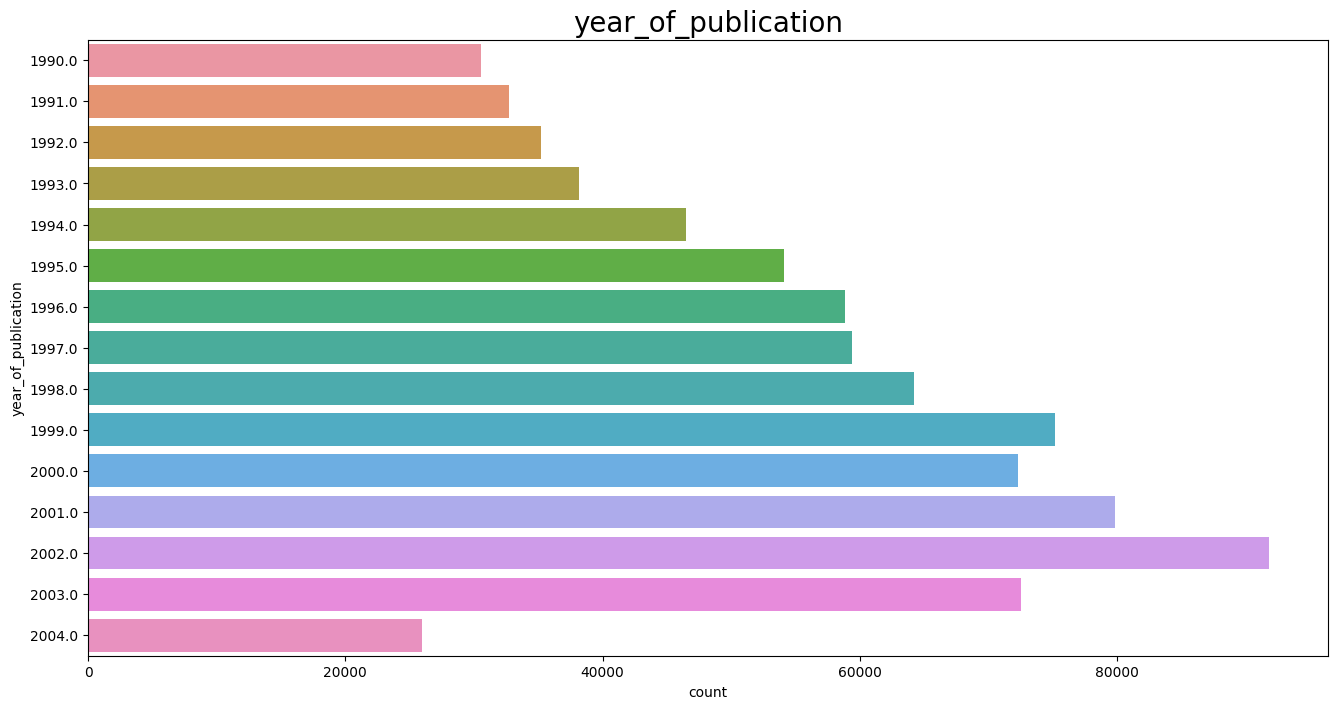

In [199]:
# Visualization on year of publication variable
bar_plot(df,'year_of_publication')

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

The insights from the above analysis are as follows:

- Most books were published in the year 2002, followed by 1999 and 2001.
- The fewest occurrences are observed in the year 2004.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the bar chart, such as the number of books published in different years, could potentially help in creating a positive business impact by allowing for a better understanding of the data and its distribution. This information could be used to improve the recommendation system by taking into account the publication year when making recommendations.

#### Chart - 5 visualization of book title

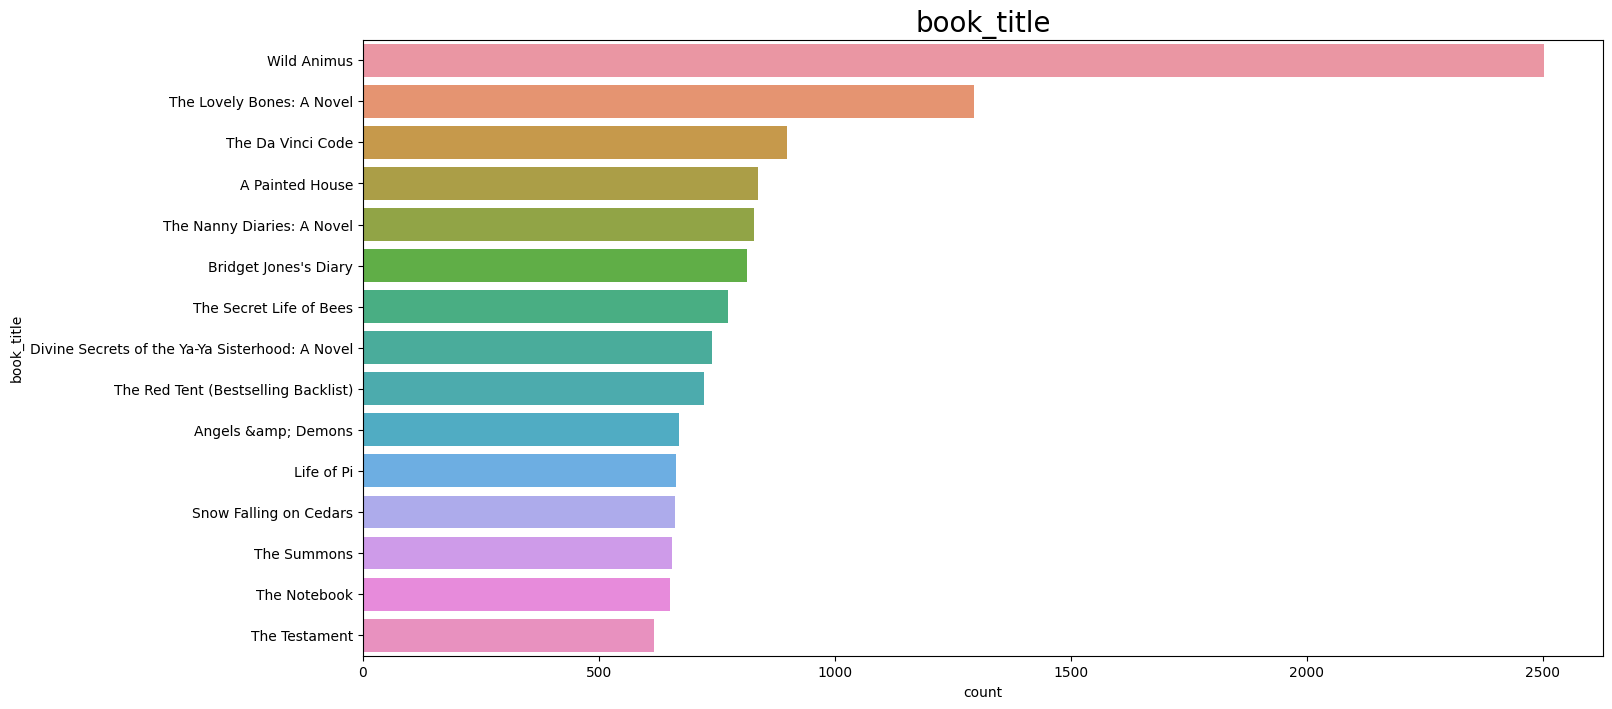

In [214]:
# Applying the function on book title variable
bar_plot(df,'book_title')

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

The insights from the above analysis are as follows:

- 'Wild Animus' has the highest number of occurrences, followed by 'Lovely Bones'.
- 'The Testament' has the fewest number of occurrences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the bar chart, such as the most `rated books`, could potentially help in creating a positive business impact by allowing for a better understanding of the data and its distribution. This information could be used to improve the recommendation system by taking into account the popularity of books when making recommendations.

#### Chart - 6 Visualization on `book author`

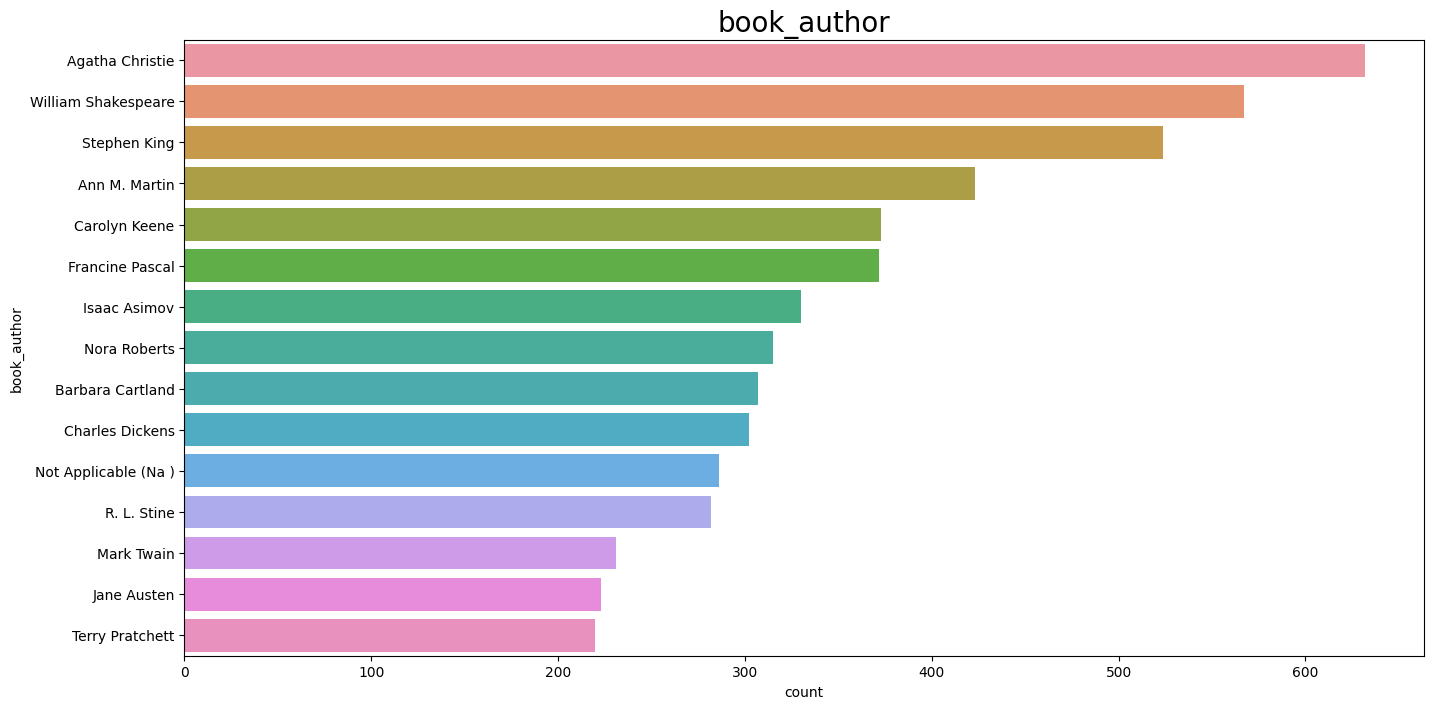

In [226]:
# Visualizing the top book author from the books data
bar_plot(books, 'book_author')

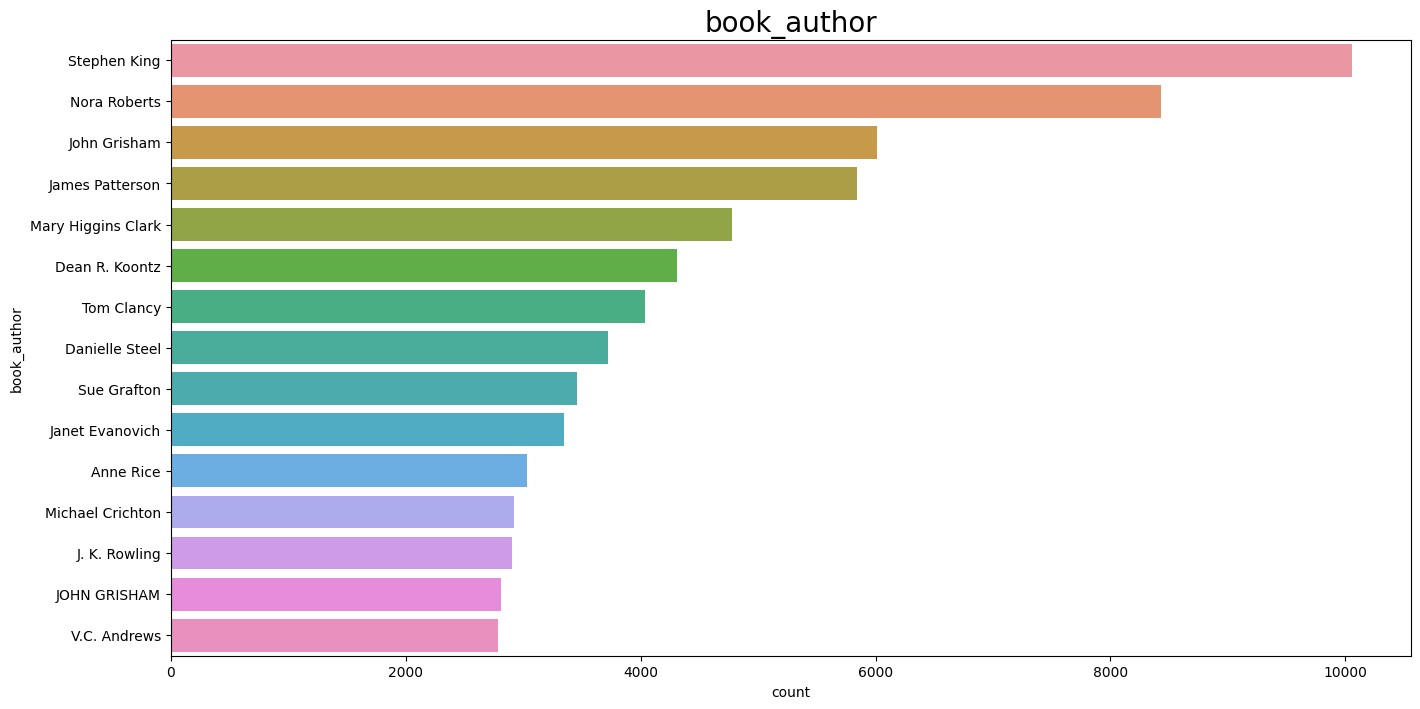

In [215]:
#visualization of book author from the data
bar_plot(df, 'book_author')

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

The insights from the above analysis are as follows:

- The highest number of occurrences is associated with `Agatha Christie`, followed by `William Shakespeare` and `Stephen King`.
- `Terry pratchett` has fewer occurrences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the top authors based on the number of books and ratings, could potentially help in creating a positive business impact. This information could be used to improve the recommendation system by taking into account the popularity of authors when making recommendations. For example, books by popular authors such as Agatha Christie and William shakespeare could be recommended to users.

#### Chart - 7

In [49]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [50]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [51]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [52]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [53]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [54]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [55]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [56]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [57]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [58]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [59]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [60]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [61]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [62]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [63]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [64]:
# Expand Contraction

#### 2. Lower Casing

In [65]:
# Lower Casing

#### 3. Removing Punctuations

In [66]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [67]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [68]:
# Remove Stopwords

In [69]:
# Remove White spaces

#### 6. Rephrase Text

In [70]:
# Rephrase Text

#### 7. Tokenization

In [71]:
# Tokenization

#### 8. Text Normalization

In [72]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [73]:
# POS Taging

#### 10. Text Vectorization

In [74]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [75]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [76]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [77]:
# Transform Your data

### 6. Data Scaling

In [78]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [79]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [80]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [81]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [82]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [83]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [84]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [85]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [86]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [87]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [88]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [89]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [90]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [91]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***